# Title : Fuel Consumption Analysis

# Abstract:
    The project focuses on analyzing fuel consumption patterns for automobiles to gain insights into their efficiency and environmental impact. By examining factors such as vehicle characteristics, driving conditions, and fuel consumption data, this project aims to provide a comprehensive understanding of the factors influencing fuel efficiency and identify opportunities for improvement. The project utilizes a dataset containing information on various automobile attributes, including engine size, horsepower, cylinders, transmission type, fuel type, and fuel consumption in liters per 100 kilometers (L/100 km). By analyzing these variables, the project seeks to uncover correlations and trends that can help stakeholders make informed decisions regarding vehicle design, engine technologies, and driving practices. Through exploratory data analysis and statistical modeling techniques, the project aims to identify the key factors influencing fuel consumption. This includes assessing the impact of engine size, horsepower, and transmission type on fuel efficiency, as well as exploring the differences in fuel consumption between different fuel types. Additionally, the project examines the relationship between driving conditions (e.g., city versus highway driving) and fuel consumption to understand the variations in efficiency under different scenarios. The outcomes of this project have implications for automotive manufacturers, policymakers, and individual vehicle owners. By understanding the factors influencing fuel consumption, manufacturers can optimize vehicle designs, develop more efficient engines, and adopt technologies that reduce environmental impact. Policymakers can utilize the findings to establish regulations and incentives that promote fuel-efficient vehicles and reduce carbon emissions. Individual vehicle owners can make informed decisions about vehicle purchases and adopt driving practices that improve fuel efficiency, thereby reducing fuel costs and environmental footprint.

In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel("measurements2.xlsx")
print(df)

     distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18      NaN     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19      NaN     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun  refill liters refill gas  
0     0     0   

*distance: Distance traveled (km).

*consume: Fuel consumption (L/100 km).

*speed: Average driving speed (km/h).

*temp_inside: Set temperature inside the car (degrees Celsius).

*temp_outside: Outside temperature measured at the end of the drive (degrees Celsius).

*specials: Special conditions. "rain" for rain, "snow" for snow, "AC" for air conditioning usage.

*gas_type: Type of gasoline selected during the last refueling.

*AC: 1 - Air conditioning was used. / 0 - Air conditioning was not used.

*rain: 1 - Rain or snow was present. / 0 - No rain or snow.

*sun: 1 - It was sunny and warm. / 0 - Otherwise

## Confirmation of Correlation.

# Scatterplot Matrix of Continuous Variables.
consume, distance, speed, temp_inside, temp_outside

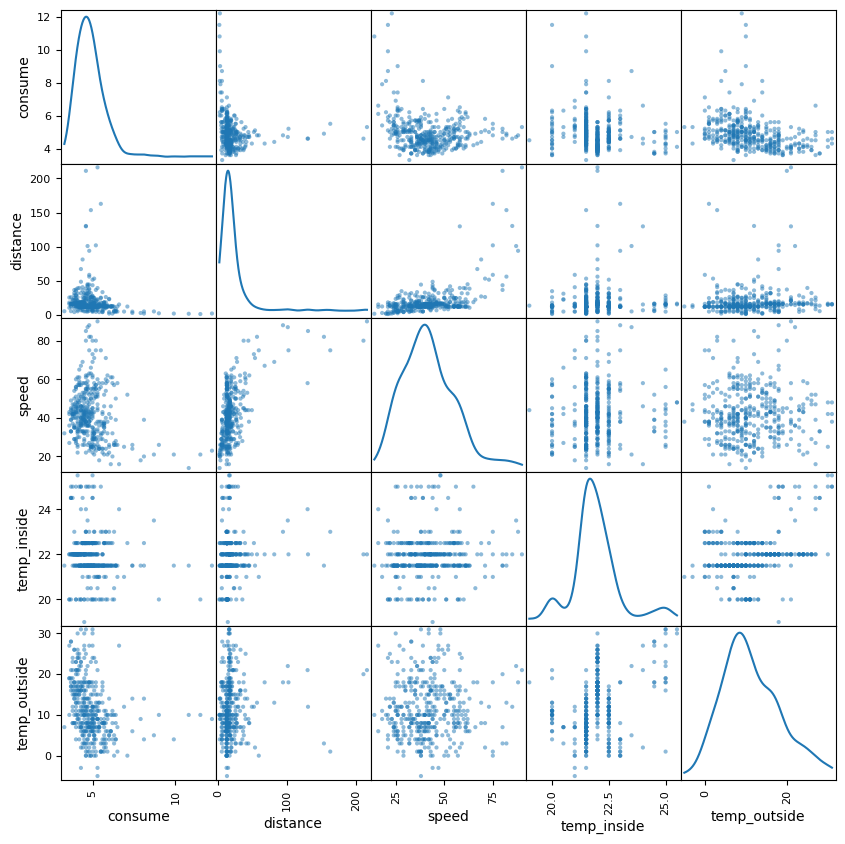

In [3]:
df_scatter = df.loc[:,["consume", "distance", "speed", "temp_inside", "temp_outside"]]
pd.plotting.scatter_matrix(df_scatter, diagonal="kde", figsize=(10.0, 10.0))
plt.show()

There is no significant skewness in the distribution of the data.

Variables that seem to have a correlation with "consume" are:

distance
speed
However, it should be noted that there is a strong correlation between "distance" and "speed."．

## "Distribution of categorical variables

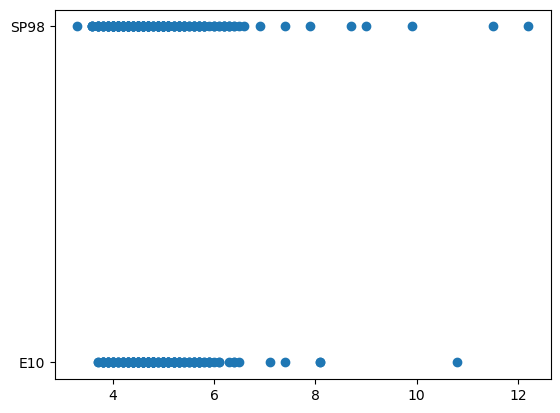

In [4]:
# gas_type
# df[["consume", "gas_type"]].boxplot(by="gas_type")
plt.scatter(df["consume"],df["gas_type"])

<Axes: title={'center': 'consume'}, xlabel='[gas_type]'>

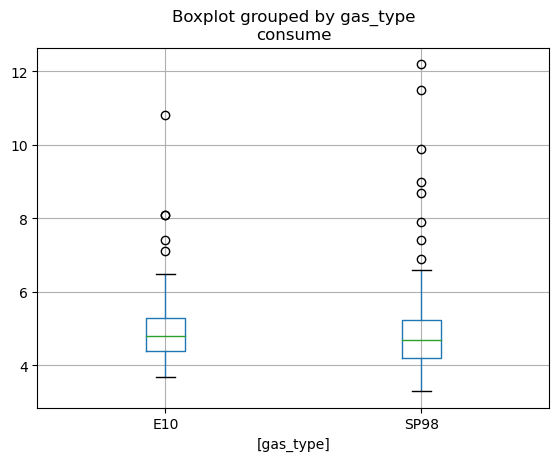

In [5]:
df[["consume", "gas_type"]].boxplot(by="gas_type")

It appears that there is no significant difference in the relationship between "consume" and "gas_type" in the given context.．

<Axes: title={'center': 'consume'}, xlabel='[AC]'>

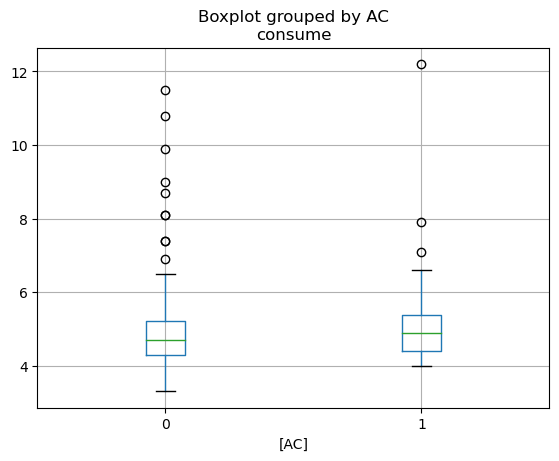

In [6]:
# AC
df[["consume", "AC"]].boxplot(by="AC")

In that case, if there is only a slight difference observed in the relationship between "consume" and "gas_type," it suggests that the choice of "gas_type" may have a minimal impact on the fuel consumption.

<Axes: title={'center': 'consume'}, xlabel='[rain]'>

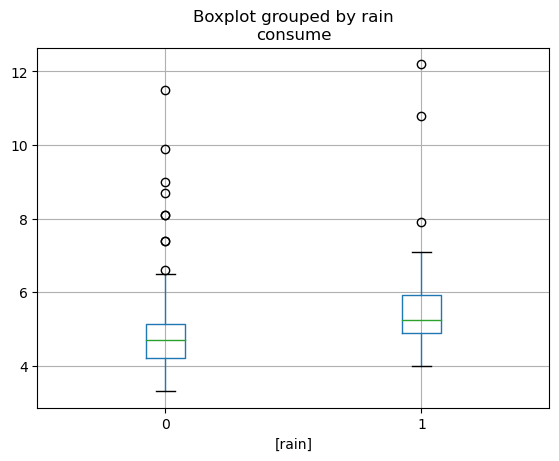

In [7]:
# rain
df[["consume", "rain"]].boxplot(by="rain")


If the impact of "gas_type" is observed to be significant in comparison to the previous variables, it suggests that the type of fuel has a notable influence on fuel consumption.

<Axes: title={'center': 'consume'}, xlabel='[sun]'>

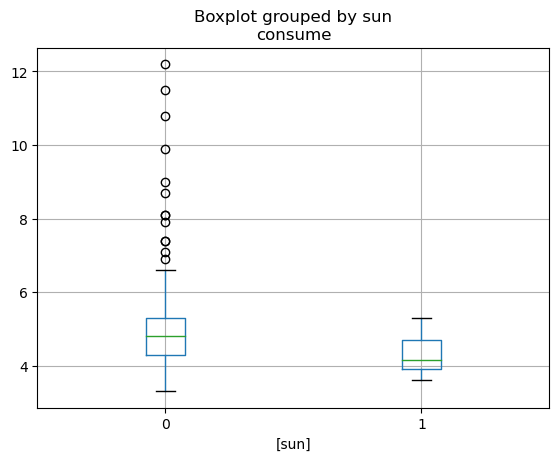

In [8]:
# sun
df[["consume", "sun"]].boxplot(by="sun")

If the impact of "gas_type" also appears to be relatively large, it suggests that the choice of fuel type has a significant influence on fuel consumption.

### distance

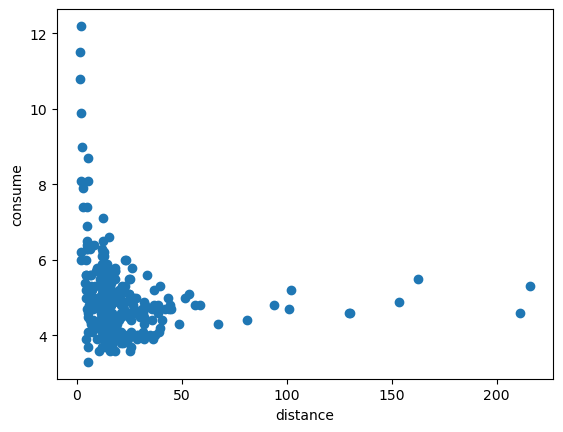

In [9]:
x = df["distance"].values
y = df["consume"].values

plt.scatter(x, y)
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

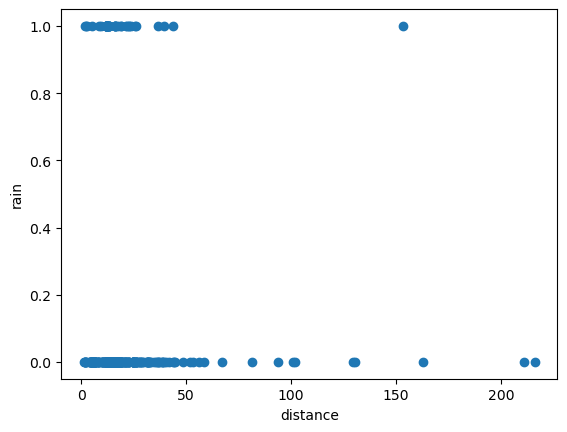

In [10]:
a = df["distance"].values
b = df["rain"].values

plt.scatter(a, b)
plt.xlabel("distance")
plt.ylabel("rain")
plt.show()

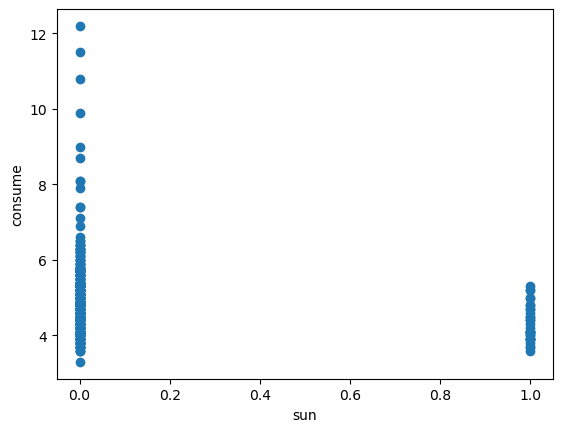

In [11]:
a = df["sun"].values
b = df["consume"].values

plt.scatter(a, b)
plt.xlabel("sun")
plt.ylabel("consume")
plt.show()

If the relationship between the variables (distance, rain, sun) and fuel consumption appears to be decreasing, you can consider taking the reciprocal of the variables and then perform the linear regression analysis. Taking the reciprocal can help examine if an inverse relationship exists, where higher values of the variables correspond to lower fuel consumption. This transformation can provide additional insights into the nature of the relationship between these variables and fuel consumption.

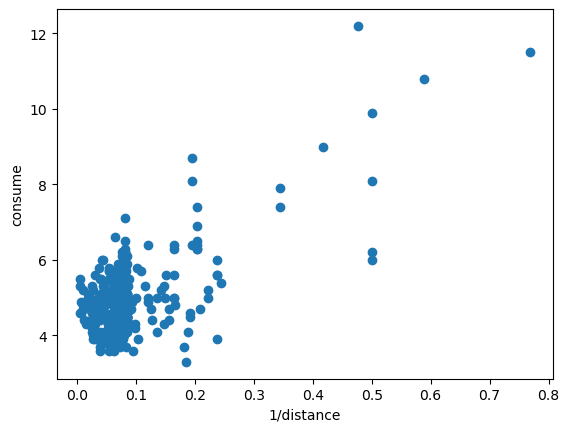

In [12]:
plt.scatter(np.reciprocal(x), y)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.show()

In [13]:
x = np.reciprocal(x)
regr = LinearRegression()

x_train = x.reshape(-1,1)
regr.fit(x_train, y)

LinearRegression()

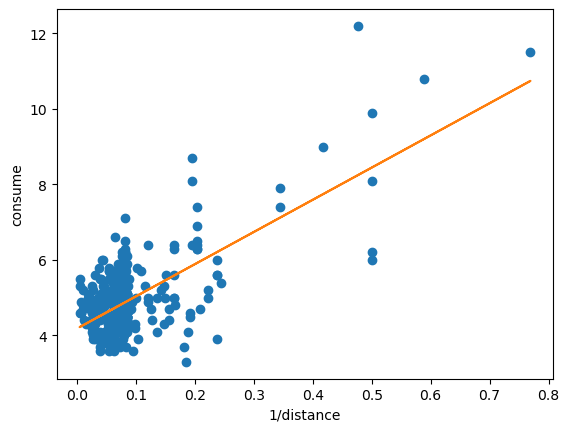

In [14]:
consume_pred = regr.intercept_ + regr.coef_[0] * x

plt.plot(x, y, "o")
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.plot(x, consume_pred)
plt.show()

# Evaluation function for accuracy.


In [15]:
import numpy as np
import math

def MAE(pred, reference):
    assert len(pred) == len(reference)
    diff = pred - reference
    diff = np.abs(diff)
    return diff.mean()

def MSE(pred, reference):
    assert len(pred) == len(reference)
    diff = pred - reference
    diff = diff**2
    return diff.mean()

def RMSE(pred, reference):
    return math.sqrt(MSE(pred, reference))

pred_values = np.array([1, 2, 3, 4, 5])
ref_values = np.array([2, 4, 6, 8, 10])

mae = MAE(pred_values, ref_values)
mse = MSE(pred_values, ref_values)
rmse = RMSE(pred_values, ref_values)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 3.0
MSE: 11.0
RMSE: 3.3166247903554


# Evaluation Using library accuracy

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_values = np.array([1, 2, 3, 4, 5])
ref_values = np.array([2, 4, 6, 8, 10])

mae = mean_absolute_error(ref_values, pred_values)
mse = mean_squared_error(ref_values, pred_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.0
MSE: 11.0
RMSE: 3.3166247903554
